# 01_DimRed_Ex1 : PCA

## Exercise 1: Face images

The goal of the exercise is to perform PCA on a dataset containing face images
The dataset contains 400 64x64 images of human faces.
How can PCA help in reconstructing faces?

In the first cell we import the libraries that we are going to use and the face dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

face_images= fetch_olivetti_faces().images
print(face_images.shape) #check the dimensions


(400, 64, 64)


We can also plot same faces.

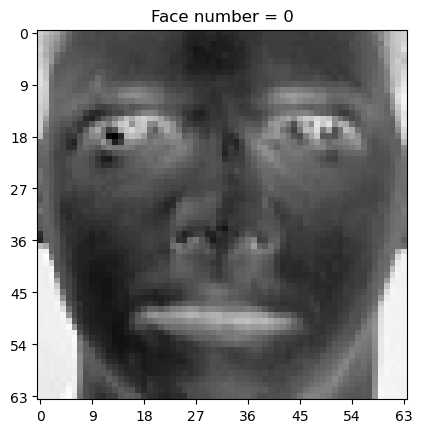

In [2]:
# select the index of the face to show
index = 0

# select the image and reshape it to show it
face = face_images[index,:]
plt.title(f'Face number = {index}')
plt.imshow(face, cmap='Greys')
plt.xticks(np.linspace(0, 63, 8))
plt.yticks(np.linspace(0, 63, 8))

plt.show()

 - For convenience, please define the number of images of faces as **Nfaces** and the number of pixeles as **Npix**

 - To be able to apply PCA, we need a matrix. 
     Please reshape the tensor face_images as a matrix (it will be our "X") and call it **face_X**

In [3]:
Nfaces  = face_images.shape[0]
Npix1   = face_images.shape[1]
Npix    = face_images.shape[1]*face_images.shape[2]

print(f'Nfaces = {Nfaces}')
print(f'Npix   = {Npix}')

face_X = face_images.reshape(Nfaces, Npix)
print(face_X.shape)

Nfaces = 400
Npix   = 4096
(400, 4096)


##  Implement PCA
Now, we write a function to **implement the PCA algorithm**. Conventionally, the mean is removed from the dataset before applying PCA. If this is not done, the mean will be the first PC.

 - HINT to define PCA:
     1. center the matrix X
     2. compute the covariance matrix S = 1/(n-1) * (X0.T @ X0)
     3. compute the eigendecomposition using np.linalg.eig
     4. sort the eigenvalues using np.sort and np.argsort
     5. compute the PC scores Z = X @ A

In [5]:
# define the PCA function

def PCA(X):
    X0 = X - np.mean(X, axis=0) # remove the mean from the dataset
    n = X.shape[0]  # number of samples
    S = 1/(n-1) * (X0.T @ X0) # compute the covariance matrix
    l, A = np.linalg.eig(S) # compute the eigenvalue decomposition
    i_sort = np.argsort(-l) # sort the eigenvalues in descending order
    l_sort = l[i_sort]
    A_sort = A[:,i_sort]

    Z = X @ A_sort  # Compute the PC scores
    return A_sort, Z, l_sort

# Uncomment when you have defined the function PCA
A, Z, l = PCA(face_X)

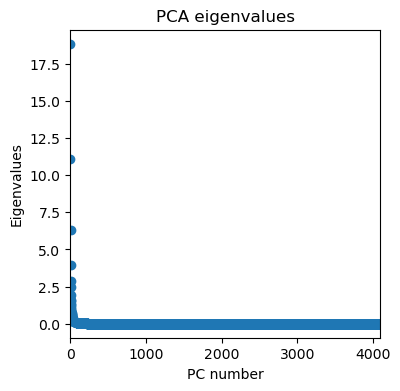

In [6]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1,Npix, Npix), l)
ax.set_title('PCA eigenvalues')
plt.xlim([0,Npix])
plt.xlabel('PC number')
plt.ylabel('Eigenvalues')
plt.show()


##  Use PCA from scikit-learn package 
Now, we can perform PCA using the scikit-learn package and plot the explained variance of the resulting PCs.
 - To do: show the **explained variance ratio as a function of the principal components**
 - Hint: the documentation and examples to use the PCA object are at:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

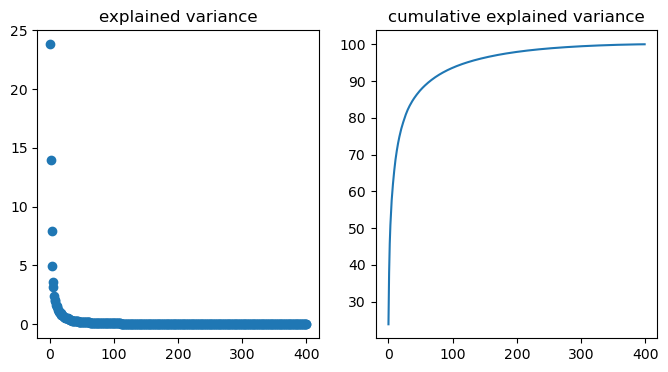

In [7]:
# We import the PCA object from the sklearn package
from sklearn.decomposition import PCA

NPC = 400
pca = PCA(n_components=NPC) # we select all the features for now
pca.fit(face_X)

# We use the attributes of PCA to find the explained variance in percentage
variance_ratio = pca.explained_variance_ratio_ * 100

fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(np.linspace(1, NPC, NPC), variance_ratio)
axs[0].set_title('explained variance')
axs[1].plot(np.cumsum(variance_ratio))
axs[1].set_title('cumulative explained variance')
plt.show()


 ##### Show the first eigenfaces.
 
 To do:
  - Retrieve the PCs (A)
  - Calculate the PC scores (Z)
  - Plot the first n_pcs=5 eigenfaces
  
Check the documentation!

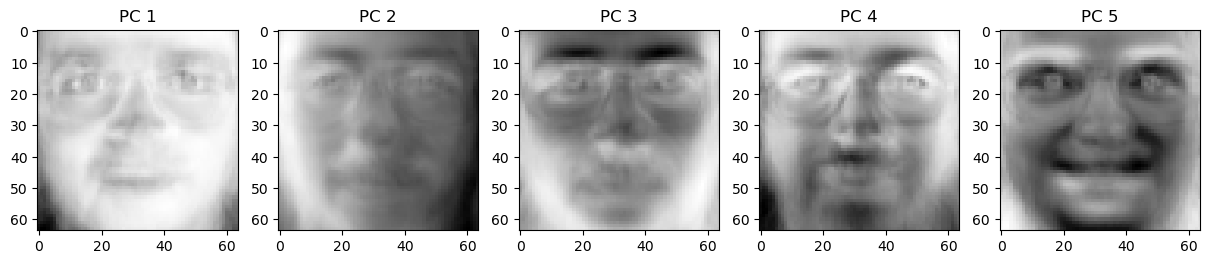

In [8]:
# We calculate the matrix A, which contains the directions of the PCs
A = pca.components_.T

# Then we calculate the PCA scores as Z = X A
Z = face_X @ A

# We can plot the first 5 PCs 
n_pcs = 5
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(A[:,i].reshape(Npix1,Npix1), cmap='Greys')
    ax.set_title('PC ' + str(i+1))


##### Test PCA as a reduced-order model (ROM)
We can also check if we can use PCA to achieve dimensionality reduction. This means that we can reconstructed the faces using few PCs.

- To do:
    1. reconstruct the face number 10 using the first 10 PCs, and compare it to the original
    2. reconstruct the same face with 1,5, 10, 100, 200 and 400 PCs. Compare the solution
    
    
- #hint: X_reconstructed = Zq Aq.T 




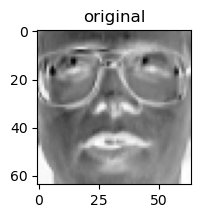

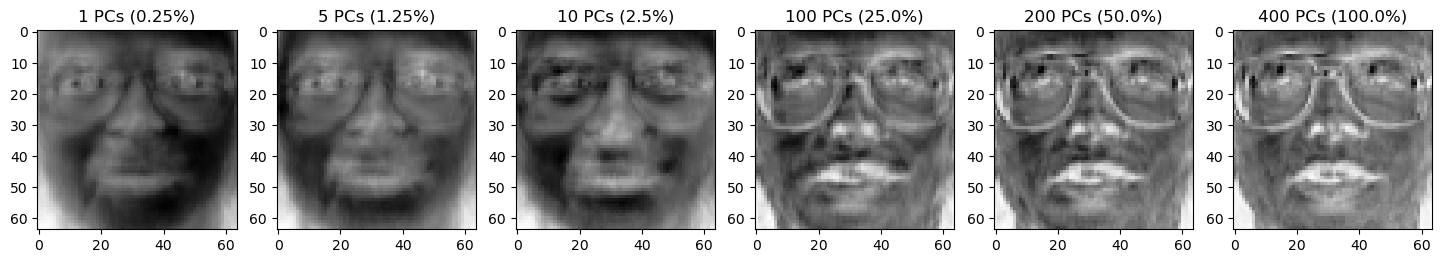

In [9]:
index= 10;
face_orig = face_X[index,:] # original face

fig1, ax = plt.subplots(figsize=(2, 2))
ax.imshow(face_orig.reshape(Npix1,Npix1), cmap='Greys')
ax.set_title('original')
plt.show()

qs = [1, 5, 10, 100 , 200, 400]; Nq = len(qs)

# We can plot them side by side 
fig2, axs = plt.subplots(1,Nq, figsize=(3*Nq, 3)); 

for iq in range(0,Nq):  
    q=qs[iq]
    qperc = q/NPC *100
    face_rec = Z[index,:q] @ A[:,:q].T        # reconstructed face
    
    axs[iq].imshow(face_rec.reshape(Npix1,Npix1), cmap='Greys')
    axs[iq].set_title( str(q) + ' PCs (' + str(qperc) + '%)')
    
plt.show()

#### Canonical basis vs PCs
Explain what is the difference between using the canonical basis and the PCs to express the images, and why we can reduce the dimensionality with PCA and not with the canonical basis. 

##### - Canonical basis
How does this work? In the canonical basis, the image is the sum of some weights multiplied by the canonical basis:
\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} w_i \mathbf{b}_i
\end{equation}

- To do: 
 1. Define the canonical basis $\mathbf{B}=[\mathbf{b}_1, \cdots \mathbf{b}_m]$
 2. Obtain the weights $w_i$ of the first 4 directions (n_basis=4)  $\mathbf{W}=[\mathbf{w}_1, \cdots \mathbf{w}_m]$
 3. Show how the first 4 basis vectors look like ($b_i$)

In [14]:
index = 10
face = face_X[index,:] 

B = np.eye(Npix) # The canonical basis is just the identity matrix
n_basis = 4

## What are the weights? --> wi --> face_X[index,i]
w = face_X[index,:]

# Plotting function
fig, axs = plt.subplots(1, (n_basis+1), figsize=((n_basis+1)*3, 3))
fig.set_facecolor('white')
axs[0].imshow(face.reshape(Npix1,Npix1), cmap='Greys')
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(n_basis):
    axs[i+1].imshow(B[:,i].reshape(Npix1,Npix1), cmap='Greys')
    axs[i+1].yaxis.set_label_coords(-0.2,0.5)
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    if i == 0:
        axs[i+1].set_ylabel('= {:.3f} $\cdot$'.format(w[i]), rotation=0, fontsize=14)
    else:
        axs[i+1].set_ylabel('+ {:.3f} $\cdot$'.format(w[i]), rotation=0, fontsize=14)

    
    axs[-1].text(Npix, Npix/2, ' + $\cdots$', rotation=0, fontsize=14)

fig.subplots_adjust(left=0, right=1, bottom=0., top=1, wspace=0.4)
plt.show()

    4. Plot original face VS reconstruction with 100 PCs
    
Obviously, we cannot truncate the canonical basis without loosing important information.

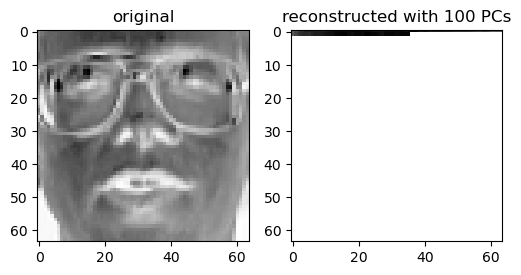

In [15]:
q = 100    # number of principal components to use
index = 10 # the index of the face that we want to reconstruct 

face_orig = face_X[index,:]                     # original face
face_rec  = face_X[index,:q] @ B[:,:q].T        # reconstructed face

# We can plot them side by side 
fig, axs = plt.subplots(1,2, figsize=(6, 3))
axs[0].imshow(face_orig.reshape(Npix1,Npix1), cmap='Greys')
axs[0].set_title('original')
axs[1].imshow(face_rec.reshape(Npix1,Npix1), cmap='Greys')
axs[1].set_title('reconstructed with ' + str(q) + ' PCs')
plt.show()

#### - PCA basis
How does this work? In the PCA basis, the image is the sum of some weights multiplied by the PC basis:
\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} z_i \mathbf{a}_i
\end{equation}

- To do: 
 1. PC basis already defined:  $\mathbf{A}=[\mathbf{a}_1, \cdots \mathbf{a}_m]$
 2. Weights already known too: $\mathbf{Z}=[\mathbf{z}_1, \cdots \mathbf{z}_m]$ 
 3. Show how the first 4 basis vectors look like ($a_i$)
 
Hint: 

    in the canonical basis X[0,:] = W[0,:] @ B.T
    
    while with PCA it is   X[0,:] = Z[0,:] @ A.T 

In [18]:
index = 10
face  = face_X[index,:]

## Define A : knowns
## What are the weights? --> zi --> Z[index,i]
z = Z[index,:]

## plot of the first 4 basis vectors b_i

fig, axs = plt.subplots(1, (n_basis+1), figsize = ((n_basis+1)*3,3) )

# plot first original face

axs[0].imshow(face.reshape(Npix1,Npix1), cmap = 'Greys')
axs[0].set_xticks([])
axs[0].set_yticks([])

# plot b1
for i in range(n_basis):
    axs[i+1].imshow(A[:,i].reshape(Npix1,Npix1), cmap = 'Greys')
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    
    if i == 0:
        axs[i+1].set_ylabel('= {:.3f} $\cdots$'.format(z[i]),rotation= 0, fontsize=14)
    else:
        axs[i+1].set_ylabel('+ {:.3f} $\cdots$'.format(z[i]),rotation= 0, fontsize=14)

    axs[-1].text(Npix, Npix/2, '+ $\cdots$',rotation= 0, fontsize=14)


plt.show()
